In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("house_price_data.csv")
df.head(10)


,Area_sqft,Bedrooms,Bathrooms,Age_years,Price
0,1360,2,1,5,7237235
1,1794,1,3,2,9767484
2,1630,5,2,27,8689407
3,1595,3,1,8,8686810
4,2138,4,3,4,12293687
5,2669,3,3,23,13568523
6,966,3,3,28,4966175
7,1738,1,2,16,8484476
8,830,3,3,13,5033841
9,1982,5,3,20,11089163


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area_sqft  100 non-null    int64
 1   Bedrooms   100 non-null    int64
 2   Bathrooms  100 non-null    int64
 3   Age_years  100 non-null    int64
 4   Price      100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


,Area_sqft,Bedrooms,Bathrooms,Age_years,Price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,1803.240000,2.900000,1.980000,15.10000,9.518803e+06
std,721.603827,1.431958,0.840635,8.97865,3.667372e+06
min,521.000000,1.000000,1.000000,0.00000,2.187215e+06
25%,1259.000000,1.750000,1.000000,7.00000,6.783889e+06
50%,1771.000000,3.000000,2.000000,16.00000,9.254247e+06
75%,2530.500000,4.000000,3.000000,23.00000,1.289664e+07
max,2949.000000,5.000000,3.000000,29.00000,1.646263e+07


In [4]:
X = df[["Area_sqft", "Bedrooms", "Bathrooms", "Age_years"]]
y = df["Price"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = model.predict(X_test)


In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 20918589868.420906
R2 Score: 0.9986782417161314


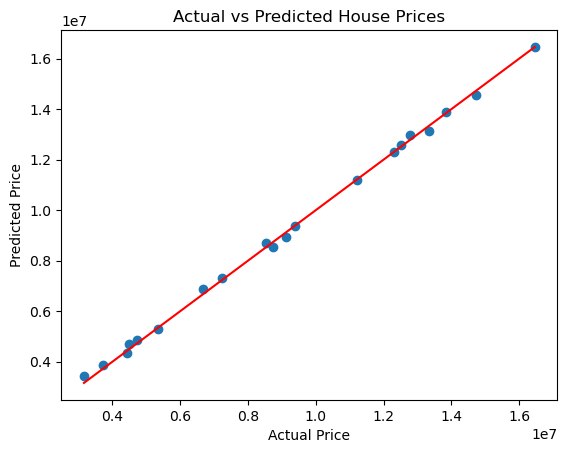

In [9]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
# Take user input
area = float(input("Enter area in sqft: "))
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = int(input("Enter number of bathrooms: "))
age = int(input("Enter age of house (years): "))

# Create DataFrame with feature names
user_input = pd.DataFrame(
    [[area, bedrooms, bathrooms, age]],
    columns=["Area_sqft", "Bedrooms", "Bathrooms", "Age_years"]
)

# Predict price
predicted_price = model.predict(user_input)

print(f"\nPredicted House Price: ₹ {predicted_price[0]:,.2f}")
